In [4]:
import requests
import json
import numpy as np
import jieba

In [8]:
url = "https://graph.facebook.com/v2.12/WithGaLoveTaiwan?fields=posts.limit(100)&access_token=EAACEdEose0cBAG0wkSHFtJYHWclH5EBKUwa4382FNRuTSByeyJzpT6ibQDlF4vF3aHPNl6DeEo3qGOW39jKK3tbMoKFl1Oi5nD77KP7wjtfXbIrXGLi8gZC96hULZBtwAma3ZAb2eTZCpuEO9lD0iMXGkjg76ZBZC6Io9rje4Gpc9fJE8eIZCORpCv7fN0fWLcZD"

In [9]:
res = requests.get(url)

In [10]:
decoder = json.JSONDecoder()
s = decoder.decode(res.text)
s['posts']['data'][0]['message']

'哈哈~在國小取景拍片時\n竟然還會被小學生認出來!!!\n我以為我的客群是18-34耶!!!\n\n(我在拍片時，你們都還沒出生吧....XDDD)'

In [28]:
gg=[]
for i in range(len(s['posts']['data'])):
    gg.append(s['posts']['data'][i]['message'])

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

In [62]:
abc = gg

In [45]:
makeitastring = ''.join(map(str, abc))

In [61]:
makeitastring

"哈哈~在國小取景拍片時\n竟然還會被小學生認出來!!!\n我以為我的客群是18-34耶!!!\n\n(我在拍片時，你們都還沒出生吧....XDDD)我說那個公車司機大哥啊...\n你戴大頭佛...是看得到路嗎?\n\n(我還是跳車好了!!! XDDDD)天啊!!!晴天霹靂!!!\n七龍珠超..連載結束了...\n我的人生失去了目標...\n我的靈魂瞬間被抽離...\n我需要一個人靜一靜...【蔡阿嘎10週年】Q&A大募集\n哈哈，只要你敢問，我們就敢回答！\n\n總共會回答大家100題的問題喔！\n滿足大家的好奇心，在底下留言就可以囉【蔡阿嘎10週年展】地點確定啦！\n7/6-7/15就在台北的華山文創園區\n為了回饋大家10年來的支持\n會朝「不收門票」的目標努力\n7月要來找我們玩喔！(期待)大家好我是二伯，今天幫蔡先森發文\n因為有人吃飽沒洗澡就在床上呼呼大睡！\n口口聲聲說有潔癖沒洗澡不能上床，\n結果．．．就睡在我的位置上！太壞了！\n只好出賣他的醜睡姿了．．喔喔喔喔~太懷念了!!!!!! (尖叫)\n在網拍看到，就買一台回家當存錢桶\n以前小時候都會跑去電動間偷玩~哈哈\n\n(現在時下年輕人，還有看過這種東西嗎？XDDD)分享影片送手機！看看你是不是五月天的鐵粉?哈哈哈，而且還要送出5支HTC送給大家喔！(抽獎方式如下)\n\n1.分享影片在你的FB (設公開)\n2.訂閱蔡阿嘎兩個頻道：http://pics.ee/AGaLife\n3.在「YouTube影片」底下留言(想說什麼都可以)\n\n4.到3月31日(六)晚上12點截止，4月2日會在YouTube影片的置頂留言，公布中獎名單。\n\n5.會以回覆留言的方式告知得獎者中獎，記得要登入YouTube看看有沒有被通知到喔。身為一位專業的YouTuber\n蔡阿嘎的後背包裡，究竟都裝些什麼呢?\n今天大公開!!!!! 哈哈哈\n\nWhat's in My Bag?開始挑選月子中心啦!!!\n沒想到現在月子中心這麼搶手\n好多夫妻是一懷孕就已經預約了\n我們懷孕5個月才在挑選...\n算很晚了耶!!! (驚訝)二伯懷孕進入第五個月後\n肚子突然長大，腰也不太能彎了\n但身為一位體貼的暖男好老公\n跪下來幫二伯完成所有的不方便\n是不能有任何怨言的!!! (認真)收到敵隊..富邦悍將的開幕戰邀請.

 - 手動清理簡體字的標點符號

In [ ]:
text = '''哈哈 在國小取景拍片時 竟然還會被小學生認出來  我以為我的客群是18-34耶    我在拍片時 你們都還沒出生吧 XDDD 我說那個公車司機大哥啊  你戴大頭佛 是看得到路嗎    我還是跳車好了  XDDDD 天啊 晴天霹靂  七龍珠超 連載結束了  我的人生失去了目標  我的靈魂瞬間被抽離  我需要一個人靜一靜  蔡阿嘎10週年 Q&A大募集 哈哈 只要你敢問 我們就敢回答   總共會回答大家100題的問題喔  滿足大家的好奇心 在底下留言就可以囉 蔡阿嘎10週年展 地點確定啦  7/6-7/15就在台北的華山文創園區 為了回饋大家10年來的支持 會朝「不收門票」的目標努力 7月要來找我們玩喔  期待 大家好我是二伯 今天幫蔡先森發文 因為有人吃飽沒洗澡就在床上呼呼大睡  口口聲聲說有潔癖沒洗澡不能上床  結果 就睡在我的位置上 太壞了  只好出賣他的醜睡姿了 喔喔喔喔 太懷念了    尖叫  在網拍看到 就買一台回家當存錢桶 以前小時候都會跑去電動間偷玩 哈哈   現在時下年輕人 還有看過這種東西嗎 XDDD 分享影片送手機 看看你是不是五月天的鐵粉 哈哈哈 而且還要送出5支HTC送給大家喔  抽獎方式如下   1.分享影片在你的FB  設公開  2.訂閱蔡阿嘎兩個頻道：http://pics.ee/AGaLife 3.在「YouTube影片」底下留言 想說什麼都可以   4.到3月31日 六 晚上12點截止 4月2日會在YouTube影片的置頂留言 公布中獎名單。  5.會以回覆留言的方式告知得獎者中獎 記得要登入YouTube看看有沒有被通知到喔。身為一位專業的YouTuber 蔡阿嘎的後背包裡 究竟都裝些什麼呢  今天大公開   哈哈哈  What's in My Bag 開始挑選月子中心啦  沒想到現在月子中心這麼搶手 好多夫妻是一懷孕就已經預約了 我們懷孕5個月才在挑選  算很晚了耶   驚訝 二伯懷孕進入第五個月後 肚子突然長大 腰也不太能彎了 但身為一位體貼的暖男好老公 跪下來幫二伯完成所有的不方便 是不能有任何怨言的   認真 收到敵隊 富邦悍將的開幕戰邀請  不要鬧了  好歹我也是20幾年的兄弟魂  不是幾件漂亮的帽子、球衣就能收買 這輩子只穿兄弟球衣啦  有骨氣 我也是低成本cosplay大師  想要變身成超級賽亞人嗎  簡單  買一條香蕉吧    拍完還可以吃呢  哈哈哈 哼哼  身為踢館大師沒有在怕的 「沒有踢得掉的館 只有砸不完的招牌 」  扛棒緊急加印 踢館之路還沒結束呢   囂張  踢館大師#4 蔡阿嘎V.S千千大胃王  哼  聽說這個叫千千女生很會吃  我20分鐘輕鬆吃完「70顆水餃」  今天就讓我來拆他的招牌  跩 昨晚半夜醒來 看到二伯的睡姿  嘛哈哈哈哈 差點沒笑死   孕婦的姿勢好豪邁喔   hen壞 我：我要一杯珍珠紅茶拿鐵 店員：請問要加紅茶拿鐵 還是咖啡拿鐵  嘎：那 改珍珠咖啡拿鐵好了 店員：我們咖啡機壞掉了 沒有咖啡喔  我：     所以   你累了嗎  XDDDDD你看完 有不爭氣的笑了嗎  哈哈 一年更新一集的「嘎冷筍小劇場」 再度來挑戰你的冷笑話極限啦    尺度越來越大 越來越北七 XDDD 那個 不瞞大家說 我其實還蠻有模仿天分的  盧廣仲超像的啊  哈哈哈難道只有我覺得  最近這個很搶手的口罩 長得很像「包水果的泡棉」嗎   為什麼要這麼貴啊啊啊   我真的不懂 XDDD  蔡阿嘎廚藝大考驗   身為一位好老公 為辛苦懷孕的二伯下廚煮飯 是一定要的 孕婦要少油少鹽少糖、又不能
'''

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

 - 匯入可以使用的中文字體

In [13]:
font = r'C:\Windows\Fonts\SimSun.ttc'

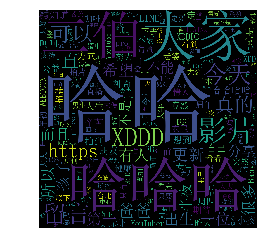

In [14]:
text_from_file_with_apath = text

wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

my_wordcloud = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

 - 可以看出在此粉專中，以歡樂搞笑字眼"哈哈"居多
 - 可以看到"二伯"、"出生"、"爸爸"字眼，因此可以推論為在懷孕時期的發文